# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [2]:
import pandas as pd
import numpy as np

C:\Users\TUF\AppData\Local\Temp\ipykernel_15004\2937650959.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Read the csv data into a pandas dataframe and display the first 5 samples

In [3]:
real_estate_data = pd.read_csv('Real_estate.csv')
real_estate_data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


### Show more information about the dataset

In [4]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [5]:
real_estate_data.shape

(414, 8)

### What are the features available in the dataset?

In [6]:
real_estate_data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [7]:
real_estate_data.fillna(np.nan)
missing_data = ((key, real_estate_data.loc[real_estate_data[key].isna(), key].size) for key in real_estate_data.keys())
pd.DataFrame(missing_data) 

,0,1
0,No,0
1,X1 transaction date,0
2,X2 house age,0
3,X3 distance to the nearest MRT station,0
4,X4 number of convenience stores,0
5,X5 latitude,0
6,X6 longitude,0
7,Y house price of unit area,0


### Group all the features as dependent features in X

In [77]:
Xs = [Xs for Xs in real_estate_data.columns if Xs!= 'Y house price of unit area']
x_data = real_estate_data[Xs]
x_data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [78]:
y_data = real_estate_data.loc[:, 'Y house price of unit area']
print(y_data)

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64


### Split the dataset into train and test data

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size=0.2,
                                                    random_state=10000
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 7)
(83, 7)
(331,)
(83,)


### Choose the model (Linear Regression)

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Create an Estimator object

In [123]:
linear_regression = LinearRegression(fit_intercept=True,                                     
                                     copy_X=True,
                                     n_jobs = 1
)

### Train the model

In [124]:
linear_regression.fit(X_train, y_train)

LinearRegression(n_jobs=1)

### Apply the model

In [125]:
y_pred = linear_regression.predict(X_test)
print(y_pred)

[44.97276394 47.56306    38.75195592  9.68320789 38.84604941 14.90350199
 43.65862076 45.75178694 30.95858503 54.86991117 24.22288273 32.23461315
 38.21819745 48.59965335 48.17598013 42.13232002 29.34403824 28.66979593
 27.93366029 34.04349103 29.95312815 42.70159901 42.55830719 34.43198715
 13.1847944  37.50462257 40.21185701 19.37013675 47.95248838 52.68814462
 41.91383009 43.31710159 27.71971271 49.12596155 49.90326917 43.09201617
 49.73431823 43.60356448 46.21129429 31.9277626  31.1705209  38.05718248
 25.03586667 41.9851482  37.04289385 46.66867817 12.85492716 44.18605225
 12.25740301 44.61616026 45.87336576 29.3874665  24.74798693 38.92994243
 36.85041816 36.86676203 43.45386696 38.92554091 20.84112538 13.03905125
 39.77084215 41.76168214 44.67729292 11.5254293  47.95761706 46.62715674
 12.70718413 38.83815954 45.77600433 39.1660698  37.87928507 33.27654306
 33.37040088 34.17806173 31.64316536 33.82668527 30.88158437 39.41286603
 27.5087005  49.27417799  8.54020745 21.53905977 48

### Display the coefficients

In [126]:
linear_regression.coef_

array([-5.77439003e-03,  6.56570948e+00, -2.59587907e-01, -4.60101662e-03,
        1.24660560e+00,  2.05337830e+02, -1.84174842e+01])

### Find how well the trained model did with testing data

In [127]:
print("r2 score: ", metrics.r2_score(y_test, y_pred))

r2 score:  0.6888330860423517


### Plot House Age Vs Price
#### Hint: Use regplot in sns

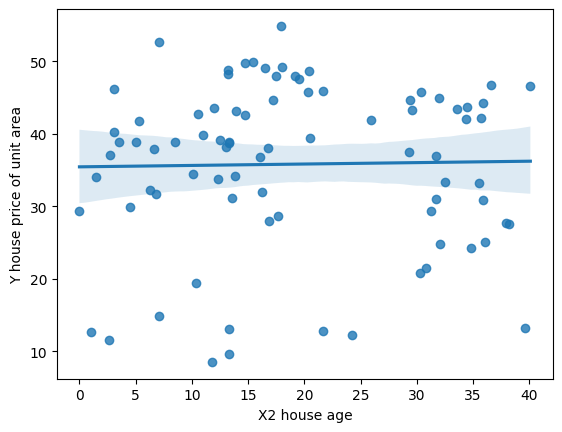

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.concat([x_data, pd.Series(y_pred, name='Y house price of unit area')], axis=1)
sns.regplot(data=data, x='X2 house age' , y='Y house price of unit area')
plt.show()


### Plot Distance to MRT station Vs Price

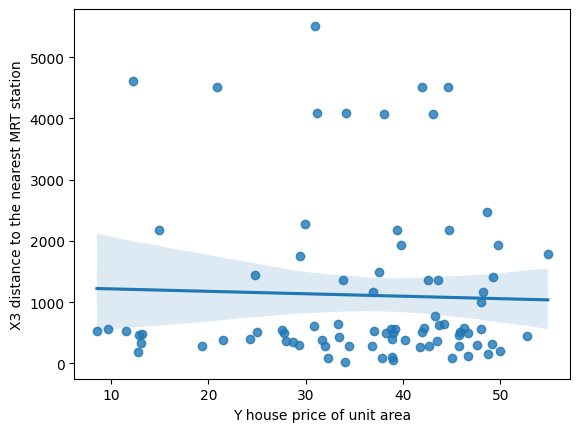

In [130]:
sns.regplot(data=data, y='X3 distance to the nearest MRT station' , x='Y house price of unit area')
plt.show()

### Plot Number of Convienience Stores Vs Price

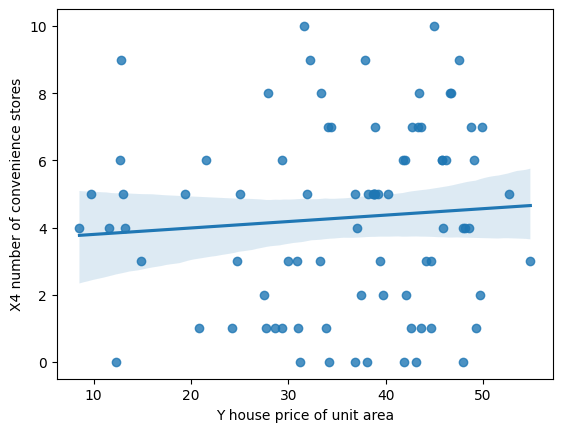

In [131]:
sns.regplot(data=data, y='X4 number of convenience stores' , x='Y house price of unit area')
plt.show()